In [21]:
import json
import pandas as pd
import matplotlib.pyplot as plt

## Question: Why are hash getting repeated?

In [2]:
train = pd.read_json("logs/train.json", lines=True)
test = pd.read_json("logs/test.json", lines=True)

print (train.shape, test.shape)

(259089, 17) (123155, 17)


In [3]:
logs = pd.concat([train, test], axis=0)

logs.shape

(382244, 17)

In [4]:
logs = logs[((logs['d_port'] == 443) | (logs['s_port'] == 443)) & (logs['protocol'] == 6)]
logs.shape

(378941, 17)

In [5]:
vc = logs['payload_hash'].value_counts()
repeat_hashes = list(vc[vc > 2].index)

df = logs[logs['payload_hash'].isin(repeat_hashes)].reset_index(drop=True)

In [6]:
print (" Total number of unique hashes: {}\n".format(logs['payload_hash'].nunique()),
       "Number of repeated hashes: {}\n".format(len(repeat_hashes)),
       "As percentage: {:.5f}\n".format(len(repeat_hashes)/logs['payload_hash'].nunique()),
       "Each repeated hash is repeated approximately {:.5f}\n".format(df.shape[0]/len(repeat_hashes)))

 Total number of unique hashes: 350191
 Number of repeated hashes: 276
 As percentage: 0.00079
 Each repeated hash is repeated approximately 104.70652



Approximately 7.9 hashes in 10,000 are repeated.

In [7]:
df.drop(['ip_version', 'protocol'], axis=1, inplace=True)

In [8]:
df.columns

Index(['timestamp', 's_ip', 'd_ip', 's_port', 'd_port', 'payload_size',
       'payload_hash', 'seq', 'ack_seq', 'doff', 'res1', 'res2', 'urg', 'ack',
       'psh'],
      dtype='object')

In [35]:
df['payload_hash'].value_counts().describe()

count      276.000000
mean       104.706522
std       1443.020992
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max      23930.000000
Name: payload_hash, dtype: float64

Let's take the most repeated hash and and perform analysis on how frequently it is repeated, it's characteristics etc.

In [10]:
df1 = df[df['payload_hash'] == vc.index[0]]
df1.shape

(23930, 15)

In [12]:
df1['s_ip'].nunique()

218

In [17]:
df2 = df1[df1['d_ip'] == '192.168.1.6']

In [29]:
seconds = (df2['timestamp'] - df2['timestamp'].shift(1)).dt.seconds

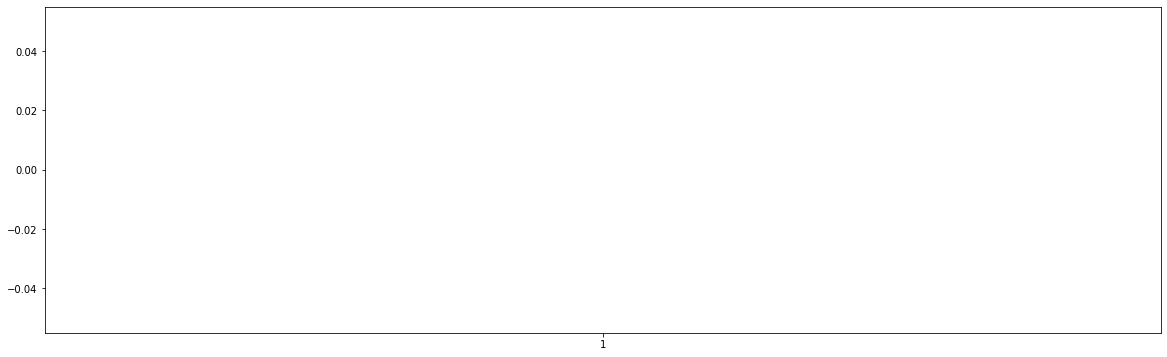

In [33]:
plt.figure(figsize=(20, 6))
plt.boxplot(seconds)
plt.show()

In [34]:
seconds.describe()

count    12866.000000
mean        18.605316
std       1050.967314
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      76931.000000
Name: timestamp, dtype: float64